https://modelcontextprotocol.io/introduction

## Model Context Protocol (MCP)
- MCP is an open source protocol that standardizes "how application provide context to LLMs"
- MCP provides a standardized way to connect AI models to different data sources and tools
- Think MCP like a USB port in our laptop whereas data sources and tools are like keyword, mouse, pendrive etc which we can connect to our laptop using USB port which is compatiable to both laptop and external devices.

This is how normal API works: client (UI) hit the https:// url to get the response from server (backend) using REST APIs in JSON format

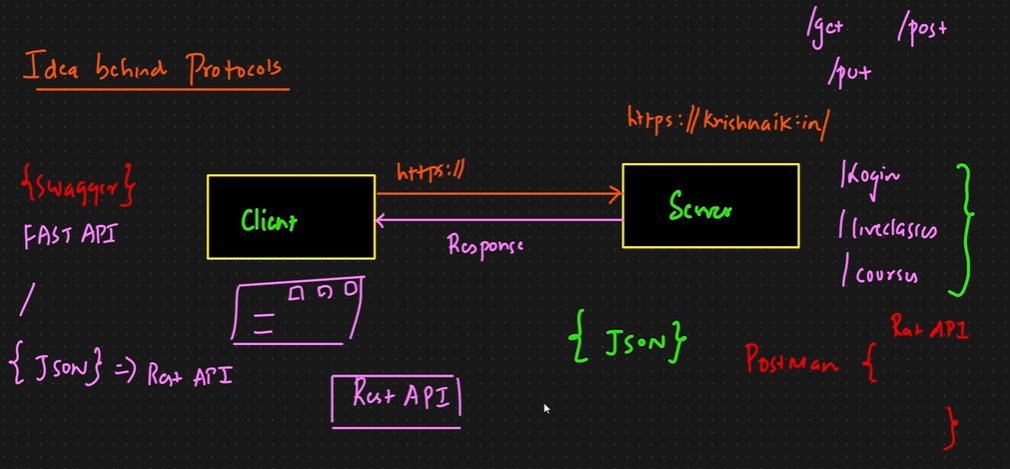

Our generative AI or Agentic AI application is directly connected to 3rd party resources like /websearch, /wikipedia and so on via REST APIs, any changes in the server side (means 3rd party side) occurs based on that we also need to modify our code which is not good approach.

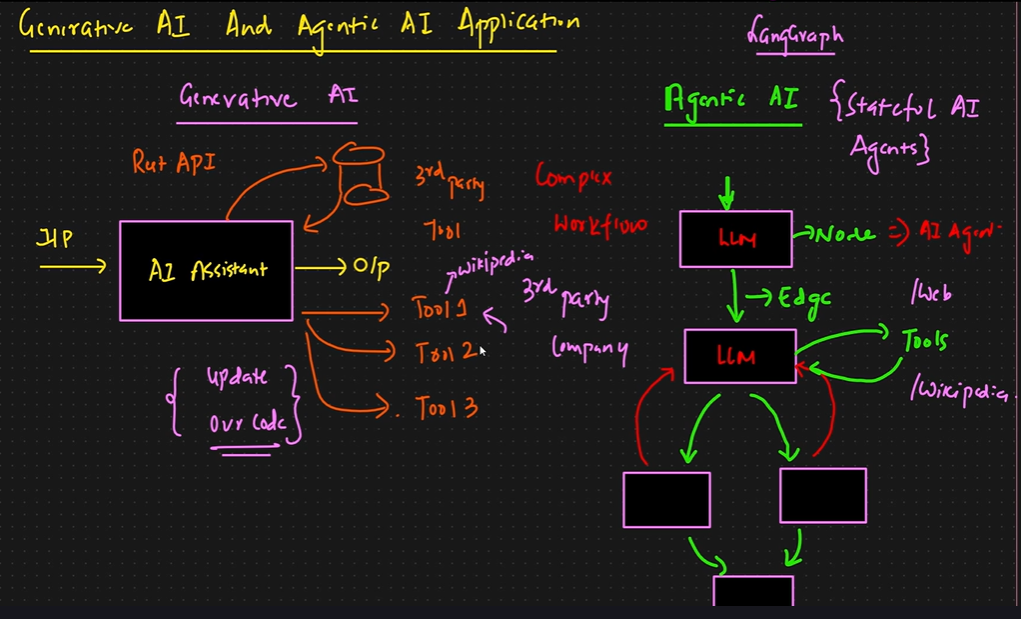

Anthropic come-up with the concept of MCP protocol where both client and server side will follow some standard set of rules like a USB port so we don't need to update our code whenever any changes occur in server side.

Here, AI assistant(LLM) is connected or communicating with 3rd party external service provider using MCP Protocol instead of direct REST APIs and "all the external services are complelety managed by the service providers itself" so we don't need to update our code when any changes occur in 3rd party side.

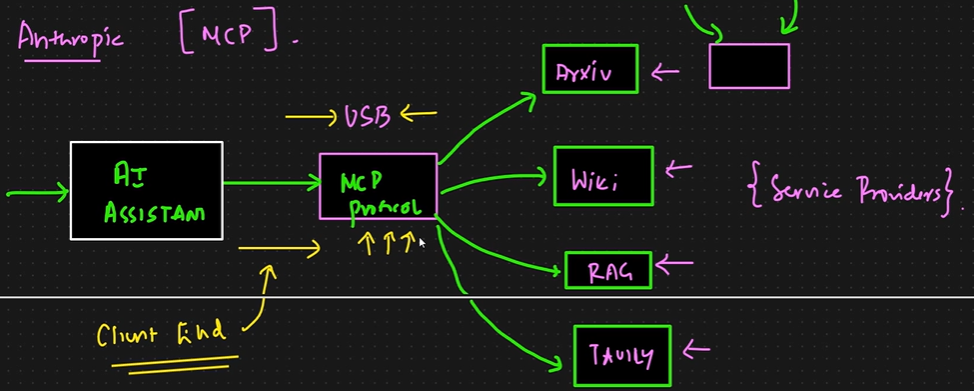

### Components of MCP
MCP follows a client-server architecture where a host application can connect to multiple servers:
- **MCP Host:** IDE, Claude Desktop, Cursor IDE, Application that want to access data through MCP
- **MCP Client:** It will be inside MCP Host, basically python code which will be used to connect with MCP Servers. It creates and maintain 1:1 connection with servers.
- **MCP Server:** They are connected to various external services and tools. Lightweight programs that each service provider expose specific capabilities through the standardized Model Context Protocol

NOTE: external services and tools can be local files, databases or external services over internet

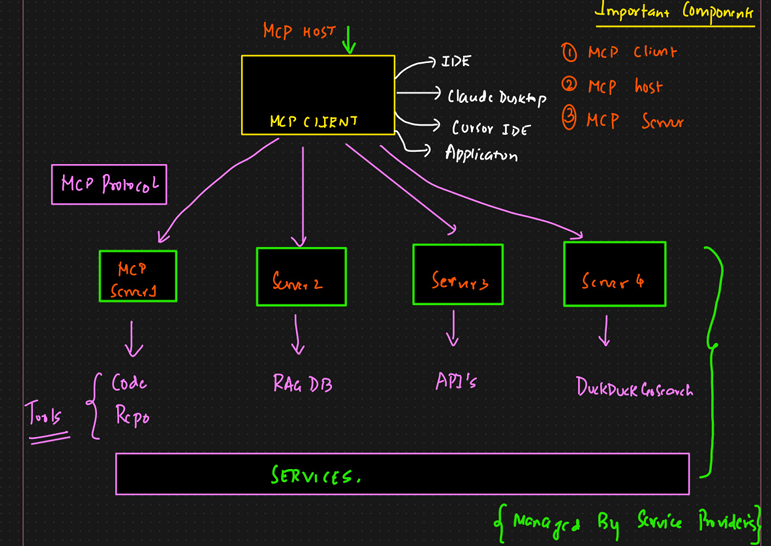

### Communication between the MCP components
- When input comes to MCP Client, we will make a initial request to MCP server and get the information about all the tools which are connected to MCP server 
- Then will provide the tools information along with the input to LLM and get the response of which tools to use 
- Once MCP Client knows which tools to use, it make the another request to MCP server for that specific tool to use and get the Context
- Then will provide the recevied Context to LLM and based on this Context and input, LLM will provide the final result

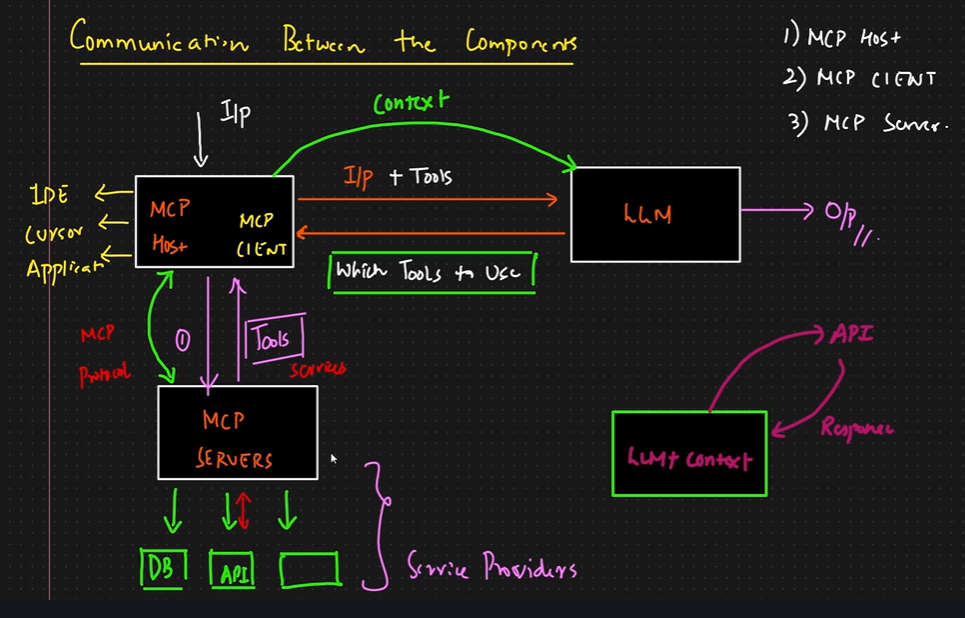

#### How to integrate with MCP servers in Claude Desktop
- Download and install the Claude Desktop(its just like a chatbot assitant which provide access to anthropic models)
- Go to file -> Settings -> Developer -> Edit Config (this will opens a json file named 'claude_desktop_config.json' which we need to edit and provide the configuration for MCP servers whom we want to connect)
- Search for "MCP servers" in google or use "https://smithery.ai/" and you will get configuration details in github
- Check fot the command in the configuration of any MCP server and make sure to have that in your system (suppose if the command is npx then make sure you have node.js installed)
- Once you make any changes to config file, make sure to completely close the cluade desktop and restart again to see the changes

    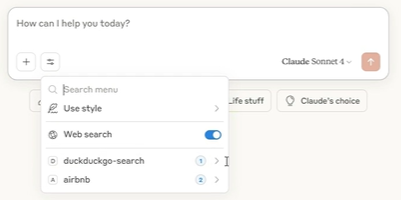